# **Various cnn models on MNIST DATA SET**

In [0]:

#defining function to plot 
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    plt.show()

In [0]:
#imorting required libarires
%matplotlib inline
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [0]:
#catch size,number of epochs and number of o/p classes
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:

#choosing the right backend availabe

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


In [54]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#normalizing the inouts
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


**Model1 : **32channels(kernels(3X3)&activation=relu)+64channels(kernels(3X3)&activation=relu)+Maxpooling(2x2)+Drouppout =0.25+Dense(128,activation=relu)+Drouppout =0.25+softmax layer

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 203us/step - loss: 0.2655 - acc: 0.9180 - val_loss: 0.0668 - val_acc: 0.9781
Epoch 2/12
60000/60000 [==============================] - 10s 160us/step - loss: 0.0874 - acc: 0.9738 - val_loss: 0.0385 - val_acc: 0.9871
Epoch 3/12
60000/60000 [==============================] - 10s 159us/step - loss: 0.0659 - acc: 0.9804 - val_loss: 0.0354 - val_acc: 0.9884
Epoch 4/12
60000/60000 [==============================] - 10s 159us/step - loss: 0.0539 - acc: 0.9844 - val_loss: 0.0297 - val_acc: 0.9901
Epoch 5/12
60000/60000 [==============================] - 10s 161us/step - loss: 0.0461 - acc: 0.9864 - val_loss: 0.0321 - val_acc: 0.9902
Epoch 6/12
60000/60000 [==============================] - 10s 163us/step - loss: 0.0412 - acc: 0.9874 - val_loss: 0.0264 - val_acc: 0.9919
Epoch 7/12
60000/60000 [==============================] - 10s 159us/step - loss: 0.0385 - acc: 0.9881 - val_loss: 0.

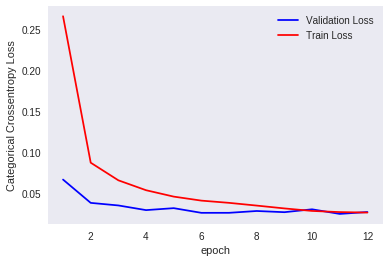

In [55]:
#model1 

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


By looking above  above plot we can see after 8 epochs the train and validation loss are same and less. we are getting test accuracy 99.22

**Model2**:
32channels(kernels(2X2)&activation=relu)+64channels(kernels(2X2)&activation=relu)+Maxpooling(2x2)+Drouppout =0.25+Dense(128,activation=relu)+Drouppout =0.5+softmax layer

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 11s 180us/step - loss: 0.3251 - acc: 0.8995 - val_loss: 0.0754 - val_acc: 0.9765
Epoch 2/12
60000/60000 [==============================] - 9s 154us/step - loss: 0.1152 - acc: 0.9650 - val_loss: 0.0541 - val_acc: 0.9823
Epoch 3/12
60000/60000 [==============================] - 9s 154us/step - loss: 0.0886 - acc: 0.9737 - val_loss: 0.0495 - val_acc: 0.9841
Epoch 4/12
60000/60000 [==============================] - 9s 154us/step - loss: 0.0705 - acc: 0.9792 - val_loss: 0.0422 - val_acc: 0.9855
Epoch 5/12
60000/60000 [==============================] - 9s 154us/step - loss: 0.0622 - acc: 0.9812 - val_loss: 0.0383 - val_acc: 0.9871
Epoch 6/12
60000/60000 [==============================] - 9s 154us/step - loss: 0.0549 - acc: 0.9834 - val_loss: 0.0385 - val_acc: 0.9873
Epoch 7/12
60000/60000 [========================

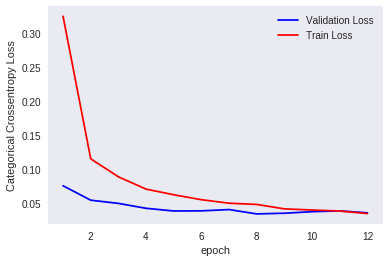

In [33]:
#model2
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


we can see after 10 epochs train and validation errors are same. we are getting 98.8 accuracy on test data

**Model3 **:32channels(kernels(5X5)&activation=relu)+64channels(kernels(5X5)&activation=relu)+Maxpooling(2x2)+Drouppout =0.25+Dense(128,activation=relu)+Drouppout =0.5+softmax layer

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 174us/step - loss: 0.2207 - acc: 0.9311 - val_loss: 0.0449 - val_acc: 0.9849
Epoch 2/12
60000/60000 [==============================] - 8s 141us/step - loss: 0.0728 - acc: 0.9786 - val_loss: 0.0383 - val_acc: 0.9874
Epoch 3/12
60000/60000 [==============================] - 8s 141us/step - loss: 0.0541 - acc: 0.9843 - val_loss: 0.0290 - val_acc: 0.9896
Epoch 4/12
60000/60000 [==============================] - 8s 141us/step - loss: 0.0436 - acc: 0.9869 - val_loss: 0.0223 - val_acc: 0.9923
Epoch 5/12
60000/60000 [==============================] - 8s 140us/step - loss: 0.0378 - acc: 0.9892 - val_loss: 0.0215 - val_acc: 0.9922
Epoch 6/12
60000/60000 [==============================] - 8s 141us/step - loss: 0.0337 - acc: 0.9902 - val_loss: 0.0229 - val_acc: 0.9920
Epoch 7/12
60000/60000 [==============================] - 8s 141us/step - loss: 0.0293 - acc: 0.9910 - val_loss: 0.0200 -

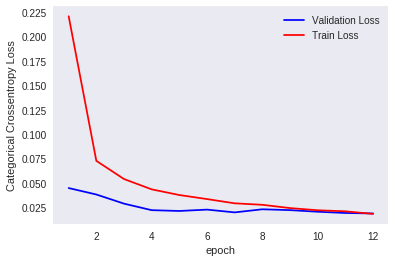

In [34]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


we are getting 99.42 accuracy on test data

**Model4:**32channels(kernels(3X3)&activation=relu)+64channels(kernels(3X3)&activation=relu)+128channels(kernels(3X3)&activation=relu)+64channels(kernels(3X3)&activation=relu)+32channels(kernels(3X3)&activation=relu)+Maxpooling(2x2)+Drouppout =0.25+Dense(128,activation=relu)+Drouppout =0.5+softmax layer

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 25s 424us/step - loss: 0.2807 - acc: 0.9125 - val_loss: 0.0691 - val_acc: 0.9771
Epoch 2/12
60000/60000 [==============================] - 23s 391us/step - loss: 0.0874 - acc: 0.9742 - val_loss: 0.0335 - val_acc: 0.9879
Epoch 3/12
60000/60000 [==============================] - 24s 394us/step - loss: 0.0644 - acc: 0.9809 - val_loss: 0.0331 - val_acc: 0.9887
Epoch 4/12
60000/60000 [==============================] - 23s 390us/step - loss: 0.0525 - acc: 0.9846 - val_loss: 0.0246 - val_acc: 0.9916
Epoch 5/12
60000/60000 [==============================] - 23s 390us/step - loss: 0.0446 - acc: 0.9863 - val_loss: 0.0242 - val_acc: 0.9921
Epoch 6/12
60000/60000 [==============================] - 23s 390us/step - loss: 0.0404 - acc: 0.9881 - val_loss: 0.0237 - val_acc: 0.9915
Epoch 7/12
60000/60000 [==============================] - 23s 391us/step - loss: 0.0365 - acc: 0.9895 - val_loss: 0.

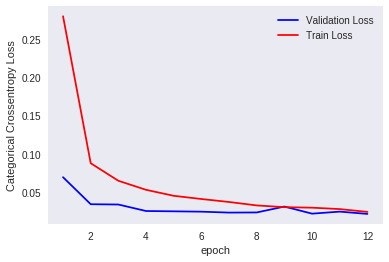

In [35]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


we are getting 99.29% accuracy on test data

Model5:32channels(kernels(5X5)&activation=relu)+64channels(kernels(5X5)&activation=relu)+128channels(kernels(5X5)&activation=relu)+64channels(kernels(3X3)&activation=relu)+32channels(kernels(5X5)&activation=relu)+Maxpooling(2x2)+Drouppout =0.25+Dense(128,activation=relu)+Drouppout =0.5+softmax layer

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 21s 343us/step - loss: 0.3884 - acc: 0.8742 - val_loss: 0.0581 - val_acc: 0.9826
Epoch 2/12
60000/60000 [==============================] - 18s 307us/step - loss: 0.0860 - acc: 0.9761 - val_loss: 0.0398 - val_acc: 0.9863
Epoch 3/12
60000/60000 [==============================] - 18s 307us/step - loss: 0.0569 - acc: 0.9838 - val_loss: 0.0229 - val_acc: 0.9922
Epoch 4/12
60000/60000 [==============================] - 18s 307us/step - loss: 0.0442 - acc: 0.9879 - val_loss: 0.0273 - val_acc: 0.9924
Epoch 5/12
60000/60000 [==============================] - 18s 307us/step - loss: 0.0377 - acc: 0.9892 - val_loss: 0.0232 - val_acc: 0.9935
Epoch 6/12
60000/60000 [==============================] - 18s 306us/step - loss: 0.0307 - acc: 0.9913 - val_loss: 0.0205 - val_acc: 0.9940
Epoch 7/12
60000/60000 [==============================] - 18s 305us/step - loss: 0.0284 - acc: 0.9922 - val_loss: 0.

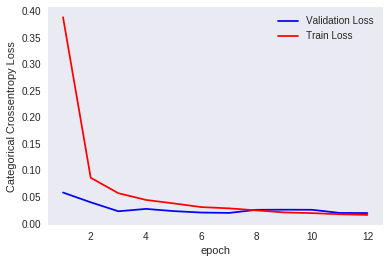

In [36]:
#model5
model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


we are getting accuracy of 99.46

Model 6:

In [0]:
model = Sequential()
model.add(Conv2D(96,(11,11),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256,(5,5),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(384,(3,3),padding='same',activation='relu'))
model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(3072,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 32s 538us/step - loss: 0.1921 - acc: 0.9381 - val_loss: 0.0815 - val_acc: 0.9773
Epoch 2/12
60000/60000 [==============================] - 30s 494us/step - loss: 0.0554 - acc: 0.9844 - val_loss: 0.0481 - val_acc: 0.9862
Epoch 3/12
60000/60000 [==============================] - 30s 494us/step - loss: 0.0420 - acc: 0.9885 - val_loss: 0.0548 - val_acc: 0.9875
Epoch 4/12
60000/60000 [==============================] - 30s 495us/step - loss: 0.0389 - acc: 0.9902 - val_loss: 0.0350 - val_acc: 0.9904
Epoch 5/12
60000/60000 [==============================] - 30s 494us/step - loss: 0.0305 - acc: 0.9919 - val_loss: 0.0367 - val_acc: 0.9910
Epoch 6/12
60000/60000 [==============================] - 30s 495us/step - loss: 0.0287 - acc: 0.9921 - val_loss: 0.0454 - val_acc: 0.9878
Epoch 7/12
60000/60000 [==============================] - 30s 496us/step - loss: 0.0266 - acc: 0.9934 - val_loss: 0.

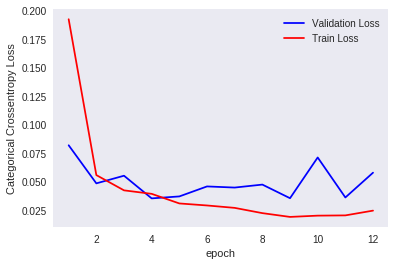

In [39]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=[x_test,y_test])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


 we are getting 99.19% accuracy

LeNet5

In [44]:
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
model = Sequential()

model.add(Convolution2D(6, 5, 5, border_mode='valid', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation("sigmoid"))

model.add(Convolution2D(16, 5, 5, border_mode='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation("sigmoid"))
model.add(Dropout(0.5))

model.add(Convolution2D(120, 1, 1, border_mode='valid'))

model.add(Flatten())
model.add(Dense(84))
model.add(Activation("sigmoid"))
model.add(Dense(10))
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5), input_shape=(28, 28, 1..., padding="valid")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), padding="valid")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(120, (1, 1), padding="valid")`
  del sys.path[0]


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 8s 130us/step - loss: 1.1792 - acc: 0.5979 - val_loss: 0.3068 - val_acc: 0.9161
Epoch 2/12
60000/60000 [==============================] - 5s 89us/step - loss: 0.3303 - acc: 0.9002 - val_loss: 0.1639 - val_acc: 0.9534
Epoch 3/12
60000/60000 [==============================] - 5s 90us/step - loss: 0.2318 - acc: 0.9285 - val_loss: 0.1260 - val_acc: 0.9615
Epoch 4/12
60000/60000 [==============================] - 5s 90us/step - loss: 0.1920 - acc: 0.9416 - val_loss: 0.0993 - val_acc: 0.9694
Epoch 5/12
60000/60000 [==============================] - 5s 90us/step - loss: 0.1740 - acc: 0.9454 - val_loss: 0.0891 - val_acc: 0.9722
Epoch 6/12
60000/60000 [==============================] - 5s 90us/step - loss: 0.1571 - acc: 0.9510 - val_loss: 0.0811 - val_acc: 0.9749
Epoch 7/12
60000/60000 [==============================] - 5s 90us/step - loss: 0.1453 - acc: 0.9543 - val_loss: 0.0753 - val_ac

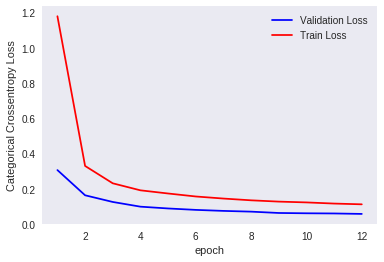

In [45]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=[x_test,y_test])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

on LeNet architeture we are getting 98.21 accuracy


**Performance table**



In [0]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names= ['Model','Train_accuracy','Test_accuracy']
x.add_row(['Model1','99.17','99.12'])
x.add_row(['Model2','98.90','98.83'])
x.add_row(['Model3','99.45','99.42'])
x.add_row(['Model4','99.27','99.29'])
x.add_row(['Model5','99.54','99.46'])
x.add_row(['Model6','99.45','99.19'])
x.add_row(['LeNet5','96.85','98.21'])


In [63]:
print(x)

+--------+----------------+---------------+
| Model  | Train_accuracy | Test_accuracy |
+--------+----------------+---------------+
| Model1 |     99.17      |     99.12     |
| Model2 |     98.90      |     98.83     |
| Model3 |     99.45      |     99.42     |
| Model4 |     99.27      |     99.29     |
| Model5 |     99.54      |     99.46     |
| Model6 |     99.45      |     99.19     |
| LeNet5 |     96.85      |     98.21     |
+--------+----------------+---------------+


Conclusion : By looking above table we can say model 3 is the best model